# Домашнее задание по статистическому анализу на python

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [0]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [63]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [0]:
df= df.dropna(subset=['Freedom'])
df= df.dropna(subset=['Positive affect'])

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

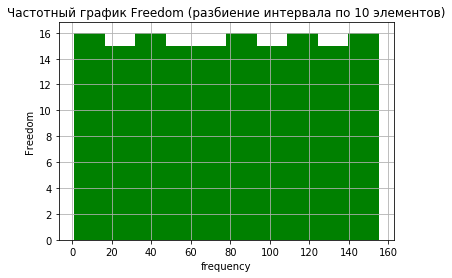

In [122]:
Freedom = df['Freedom']
Positive_affect= df['Positive affect']
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(Freedom, 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

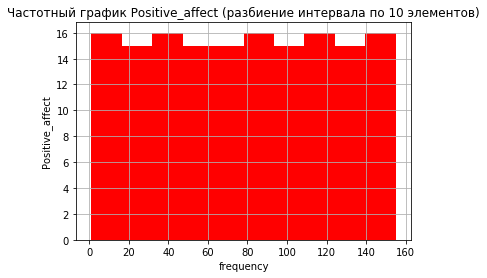

In [124]:
n, bins, patches = plt.hist(Positive_affect, 10, facecolor='r')

plt.xlabel('frequency')
plt.ylabel('Positive_affect')
plt.title('Частотный график Positive_affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Графики свидетельствуют о практически равномерном распределении выборки

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [71]:
import statistics
df['Freedom'] = df.Freedom.astype('float64')
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  78.0


In [9]:
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
Freedom_counts = {}
for p in Freedom:
    if p not in Freedom_counts:
        Freedom_counts[p] = 1
    else:
        Freedom_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_Freedom = None
for k, v in Freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_Freedom = k
print('Значение моды: ', mode_Freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


In [67]:
print('Мат ожидание: ', statistics.mean(df['Freedom']))

Мат ожидание:  78.0


In [70]:
print('Стандартное отклонение: ', statistics.pstdev(Freedom))

Стандартное отклонение:  44.74371464239419


In [72]:
print('Дисперсия: ', statistics.pvariance(Freedom))

Дисперсия:  2002.0


In [73]:
print('Максимум: ', max(Freedom))

Максимум:  155.0


In [74]:
print('Минимум: ', min(Freedom))

Минимум:  1.0


In [75]:
duration_range = max(duration) - min(duration)
print('Размах: ', duration_range)

Размах:  154.0


In [76]:
Freedom.isnull().sum()

0

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

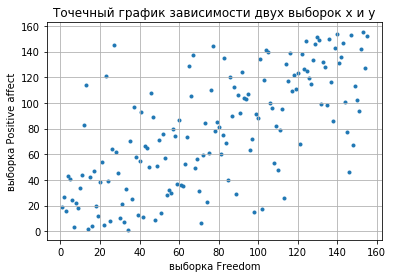

In [80]:

plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(Freedom, Positive_affect, marker='.')

In [82]:
df['Positive affect'] = Positive_affect
from scipy.stats import pearsonr
corr, p_value = pearsonr(Freedom, Positive_affect)
print(corr)

0.6817698430601656


Коэффициент свидетельствует о довольно сильной положительной корреляции между величинами

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [83]:
print(statistics.mean(Freedom))

78.0


In [85]:
Freedom_1 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))

0.0


In [86]:
min(Freedom_1)
max(Freedom_1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_2 = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

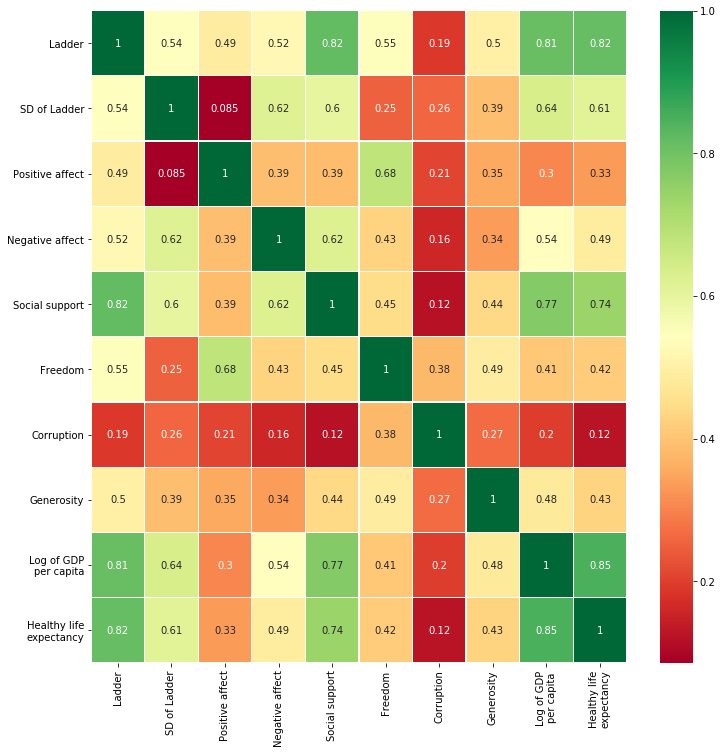

In [87]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [111]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_1=pd.read_csv(url)
df_1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [0]:
AveragePrice= df_1['AveragePrice']

Сделать частотный график колонки AveragePrice. Какое это распределение?

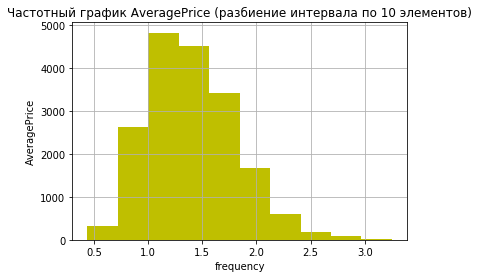

In [114]:
n, bins, patches = plt.hist(AveragePrice, 10, facecolor='y')


plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Частотный график схож с нормальным распределением с некоторыми отклонениями. 

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

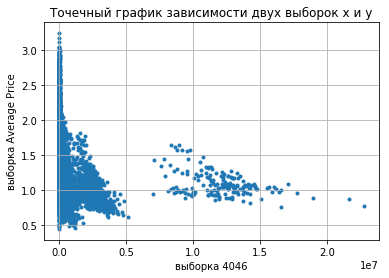

In [127]:
plt.xlabel('выборка 4046')
plt.ylabel('выборка Average Price')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(df_1['4046'], AveragePrice, marker='.')

In [128]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df_1['4046'], AveragePrice)
print(corr)

-0.2083170484878848


График и коэффициент свидетельствует о небольшой отрицательной корреляции. То есть можно сделать вывод, что данный вид авокадо не влияет почти на среднюю стоимость, что связано вероятнее всего с небольшим объемом приобретения